#### Importing Libraries

In [1]:
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
# index = pd.date_range(start='3/9/2020', periods =15)

In [3]:
# index

#### Creating Dataframe from 3 March to 24 March 

In [4]:
dataset = {'date':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'Positive':[2,5,7,14,19,31,33,39,41,45,48,52,64,74,97,101]}

In [5]:
df = pd.DataFrame(data=dataset)

In [6]:
df.head(5)

,date,Positive
0,0,2
1,1,5
2,2,7
3,3,14
4,4,19


#### Making log of the Predictions

In [7]:
df['log_positive'] = np.log(df.Positive)

In [8]:
df.head()

,date,Positive,log_positive
0,0,2,0.693147
1,1,5,1.609438
2,2,7,1.945910
3,3,14,2.639057
4,4,19,2.944439


#### Creating statsmodel 

In [9]:
import statsmodels.api as sm

In [10]:
X = df.date
X = sm.add_constant(X)

In [11]:
y = df.log_positive

In [12]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           log_positive   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     87.18
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           2.17e-07
Time:                        19:37:10   Log-Likelihood:                -8.0393
No. Observations:                  16   AIC:                             20.08
Df Residuals:                      14   BIC:                             21.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7152      0.204      8.403      0.0

/home/asus/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


#### Here 1.7152 is the cosntant is the intial value and growth rate is around 0.2165 of the  corona positive patients

In [13]:
def linear_predictions(t):
    return np.exp(1.7152) * np.exp(0.2165) ** t 

In [14]:
df['Predictions'] = df.date.apply(linear_predictions)
df.head(10)

,date,Positive,log_positive,Predictions
0,0,2,0.693147,5.557787
1,1,5,1.609438,6.901232
2,2,7,1.945910,8.569420
3,3,14,2.639057,10.640846
4,4,19,2.944439,13.212984
5,5,31,3.433987,16.406868
6,6,33,3.496508,20.372786
7,7,39,3.663562,25.297359
8,8,41,3.713572,31.412315
9,9,45,3.806662,39.005396


#### The Growth of the Patients at a rapid combining both without curfew/lockdown and with curfew/lockdown

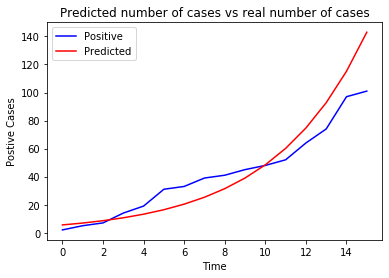

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df.date, df.Positive, label='Positive',color='blue')
plt.plot(df.date, df.Predictions,label='Predicted',color= 'red')
plt.title('Predicted number of cases vs real number of cases')
plt.xlabel('Time')
plt.ylabel('Postive Cases')
plt.legend()

## Predicting Cases on 25th of March

In [19]:
print("The Cases on 25th March would be:",round(linear_predictions(16)))

The Cases on 25th March would be: 178.0
